In [1]:
%load_ext autoreload
import sys
sys.path.append('../..')
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os, shutil, cv2
from faces_clustering import get_files_folder, VideoClustering, is_video

Using TensorFlow backend.


In [2]:
videos_path = '/home/paulo/Documentos/testes/'
video_urls = get_files_folder(videos_path, is_video)
all_embs_path = f'{videos_path}/all_embs'
metadata_path = f'{videos_path}/metadata'

## Extracting Video Metadata

In [ ]:
if os.path.isdir(all_embs_path):
    shutil.rmtree(all_embs_path)
os.mkdir(all_embs_path)

if os.path.isdir(metadata_path):
    shutil.rmtree(metadata_path)
os.mkdir(metadata_path)

In [ ]:
video_clustering = VideoClustering('senet50', 'agglomerative', verbose=1)

In [ ]:
for video_url in tqdm(video_urls):
    video_clustering.cluster(video_url,fps=0.1)    
    video_clustering.dt_embs.to_pickle(f"{all_embs_path}/{video_url.split('/')[-1]}_embs.pkl")
    video_clustering.video_metadata.to_pickle(f"{metadata_path}/{video_url.split('/')[-1]}_meta.pkl")

## Super Clustering

In [3]:
from faces_clustering import silhouette, generate_colors

In [4]:
meta_urls = get_files_folder(metadata_path, lambda x: x.lower().endswith(('_meta.pkl')))
dt_metas = [pd.read_pickle(meta) for meta in meta_urls]

In [5]:
dt_all_meta = pd.concat(dt_metas, axis = 0)

In [6]:
embs = [list(emb) for emb in dt_all_meta.embeddings.values]

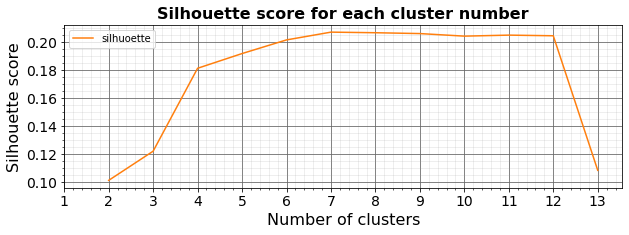

Best cluster number is 12


In [7]:
label_clusters = silhouette(embs,alg = 'agglomerative', verbose = 2, thresh=0.05)
dt_all_meta['super_cluster'] = label_clusters

In [8]:
colors = generate_colors(len(set(dt_all_meta.video)))
video_colors = {}
for i, video in enumerate(set(dt_all_meta.video)):
    video_colors[video] = colors[i]
dt_all_meta['video_color'] = dt_all_meta.video.map(video_colors)

In [9]:
dt_all_meta.columns

Index(['embeddings', 'frames', 'total_frames', 'faces_samples', 'video',
       'super_cluster', 'video_color'],
      dtype='object')

In [11]:
dt_all_meta[['embeddings', 'frames', 'total_frames', 'video','super_cluster', 'video_color']].head(20)

,embeddings,frames,total_frames,video,super_cluster,video_color
cluster_agglomerative,,,,,,
0,"[0.015555817347306471, 8.081958257235014, 0.46...","[2100, 300, 5100, 5700, 2400, 900, 4500, 1500,...",19,/home/paulo/Documentos/testes/ciro_bolso.mp4,0,"[0.0, 255.0, 102.0]"
1,"[0.3533298021648079, 8.705110609531403, 0.0090...","[300, 4200, 600, 3600, 3300, 3000, 2700, 3900]",19,/home/paulo/Documentos/testes/ciro_bolso.mp4,1,"[0.0, 255.0, 102.0]"
0,"[0.5974979845806956, 3.5082061752676963, 1.132...","[13680, 9360, 5760, 2160, 480, 6240, 6480, 144...",62,/home/paulo/Documentos/testes/starwars.mp4,9,"[0.0, 102.0, 255.0]"
1,"[0.21184267970319423, 3.012671281894048, 2.353...","[13200, 5040, 4560, 8880, 2400, 1920, 7680, 28...",62,/home/paulo/Documentos/testes/starwars.mp4,11,"[0.0, 102.0, 255.0]"
2,"[0.05581708668198969, 8.228659206912631, 0.079...","[13680, 9360, 5760, 2160, 480, 6240, 6480, 144...",62,/home/paulo/Documentos/testes/starwars.mp4,5,"[0.0, 102.0, 255.0]"
3,"[0.10487441120751421, 4.873502375448451, 0.115...","[13200, 5040, 4560, 8880, 2400, 1920, 7680, 28...",62,/home/paulo/Documentos/testes/starwars.mp4,7,"[0.0, 102.0, 255.0]"
4,"[1.1350668343630703, 2.6353480599143286, 0.141...","[10800, 7200, 11280, 3600, 7440, 3360, 12000, ...",62,/home/paulo/Documentos/testes/starwars.mp4,8,"[0.0, 102.0, 255.0]"
5,"[0.17320501506328584, 4.574567747116089, 2.379...","[7200, 11280, 3600, 7440, 3360, 12000, 6960, 6...",62,/home/paulo/Documentos/testes/starwars.mp4,6,"[0.0, 102.0, 255.0]"
0,"[0.6440529367502998, 7.32012464018429, 0.00666...","[2100, 300, 5700, 2400, 900, 1500, 600, 3600, ...",23,/home/paulo/Documentos/testes/marina_ciro.mp4,1,"[255.0, 0.0, 0.0]"


Cluster  0


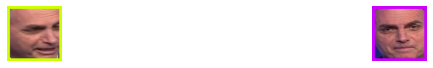

Cluster  1


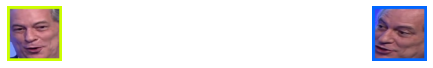

Cluster  2


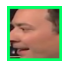

Cluster  3


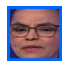

Cluster  4


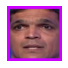

Cluster  5


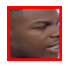

Cluster  6


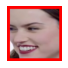

Cluster  7


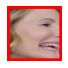

Cluster  8


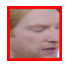

Cluster  9


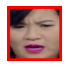

Cluster  10


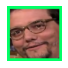

Cluster  11


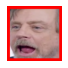

In [9]:
for cluster in set(dt_all_meta['super_cluster']):
    print('Cluster ', cluster)
    dt_cluster = dt_all_meta.loc[dt_all_meta.super_cluster == cluster]
    cols = len(dt_cluster.faces_samples)
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(12, 1))
    
    if cols > 1:
        [axi.set_axis_off() for axi in axes.ravel()]
    else:
        axes.set_axis_off()
    for i, sample in enumerate(dt_cluster.faces_samples):
        image = cv2.rectangle(sample.copy(), (0,0), sample.shape[0:2],
                              dt_cluster.video_color.values[i], int(sample.shape[0]/10))

        #axes[i].set_title(f'Person {i}')
        if cols > 1:
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_aspect('equal')
        else:
            axes.imshow(image)
            axes.axis('off')
            axes.set_aspect('equal')
    plt.show()

In [12]:
dt_all_meta.reset_index(inplace = True)
dt_all_meta.drop('cluster_agglomerative', axis=1, inplace=True)
dt_all_meta.to_csv('meta_data_video.csv')
dt_all_meta.to_pickle('meta_data_video.pkl')
dt_all_meta.head()

In [19]:
pd.read_pickle('meta_data_video.pkl').head()

,embeddings,frames,total_frames,faces_samples,video,super_cluster,video_color
0,"[0.015555817347306471, 8.081958257235014, 0.46...","[2100, 300, 5100, 5700, 2400, 900, 4500, 1500,...",19,"[[[91, 71, 70], [91, 71, 71], [92, 72, 71], [9...",/home/paulo/Documentos/testes/ciro_bolso.mp4,0,"[0.0, 255.0, 102.0]"
1,"[0.3533298021648079, 8.705110609531403, 0.0090...","[300, 4200, 600, 3600, 3300, 3000, 2700, 3900]",19,"[[[78, 86, 249], [79, 87, 248], [80, 89, 246],...",/home/paulo/Documentos/testes/ciro_bolso.mp4,1,"[0.0, 255.0, 102.0]"
2,"[0.5974979845806956, 3.5082061752676963, 1.132...","[13680, 9360, 5760, 2160, 480, 6240, 6480, 144...",62,"[[[26, 25, 41], [27, 26, 42], [30, 29, 45], [3...",/home/paulo/Documentos/testes/starwars.mp4,9,"[0.0, 102.0, 255.0]"
3,"[0.21184267970319423, 3.012671281894048, 2.353...","[13200, 5040, 4560, 8880, 2400, 1920, 7680, 28...",62,"[[[243, 243, 251], [243, 243, 251], [243, 243,...",/home/paulo/Documentos/testes/starwars.mp4,11,"[0.0, 102.0, 255.0]"
4,"[0.05581708668198969, 8.228659206912631, 0.079...","[13680, 9360, 5760, 2160, 480, 6240, 6480, 144...",62,"[[[22, 21, 35], [21, 20, 34], [23, 22, 36], [2...",/home/paulo/Documentos/testes/starwars.mp4,5,"[0.0, 102.0, 255.0]"
